# Goal

Employee turn-over is a very costly problem for companies. The cost of replacing an employee
if often larger than 100K USD, taking into account the time spent to interview and find a
replacement, placement fees, sign-on bonuses and the loss of productivity for several months.

It is only natural then that data science has started being applied to this area. Understanding
why and when employees are most likely to leave can lead to actions to improve employee
retention as well as planning new hiring in advance. This application of DS is sometimes called
people analytics or people data science (if you see a job title: people data scientist, this is your
job).

In this challenge, you have a data set with info about the employees and have to predict when
employees are going to quit by understanding the main drivers of employee churn.

# Challenge Description

We got employee data from a few companies. We have data about all employees who joined
from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the
company as of 2015/12/13 or they have quit. Beside that, we have general info about the
employee, such as avg salary during her tenure, dept, and yrs of experience.

As said above, the goal is to predict employee retention and understand its main drivers.
Specifically, you should:

* Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate
employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13.
That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have
already quit, then company headcount on 2012/03/02 for company 1 would be 1000.
You should create a table with 3 columns: day, employee_headcount, company_id.

* What are the main factors that drive employee churn? Do they make sense? Explain your
findings.

* If you could add to this data set just one variable that could help explain employee churn,
what would that be?

# Data

## Columns:

* employee_id : id of the employee. Unique by employee per company
* company_id : company id.
* dept : employee dept
* seniority : number of yrs of work experience when hired
* salary: avg yearly salary of the employee during her tenure within the company
* join_date: when the employee joined the company, it can only be between 2011/01/24
and 2015/12/13
* quit_date: when the employee left her job (if she is still employed as of 2015/12/13, this
field is NA)


In [73]:
import pandas as pd
import numpy as np
from natsort import index_natsorted
data = pd.read_csv('employee_retention.csv')
data_origin = data

In [74]:
# look at information of data, we can only quit date have null data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [75]:
data.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


In [76]:
data.head()


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [77]:
data['join_date'] = pd.to_datetime(data.iloc[:, 5])
data['quit_date'] = pd.to_datetime(data.iloc[:, 6])

In [78]:
data['duration'] = data.iloc[:, 6]- data.iloc[:, 5]

In [79]:
data['duration'] = data['duration'].dt.days



In [80]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0


In [81]:
print("the number of unique employee id", len(data['employee_id'].unique()))
print('the number of all employee id', len(data['employee_id']))


the number of unique employee id 24702
the number of all employee id 24702


In [82]:
# create new table for head_count
head_count = pd.DataFrame()
company = pd.DataFrame()
head_count['day'] = pd.date_range(pd.to_datetime('2011/01/23'), pd.to_datetime('2015/12/13'))
head_count['key'] = 1
company['company'] = data['company_id'].unique()
company['key'] = 1
head_count = head_count.merge(company,on = 'key').drop('key', 1)

D:\temp\ipykernel_78268\1612755749.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head_count = head_count.merge(company,on = 'key').drop('key', 1)


In [83]:
head_count

,day,company
0,2011-01-23,7
1,2011-01-23,4
2,2011-01-23,2
3,2011-01-23,9
4,2011-01-23,1
...,...,...
21427,2015-12-13,5
21428,2015-12-13,3
21429,2015-12-13,8
21430,2015-12-13,11


In [84]:
#calculate how many employee was join in each company for each day
data.set_index('join_date')
data.sort_values(by = 'join_date', key=lambda x: np.argsort(index_natsorted(data["join_date"])),inplace = True)
data['cumcount_join'] = data.groupby('company_id').cumcount()

In [85]:
#calculate how many employee was quit in each company for each day
data.sort_values(by = 'quit_date', inplace = True)
data.reset_index(inplace= True)
data['cumcount_quit'] = data.groupby('company_id').cumcount()

In [86]:
#extract the number of employee was join in each company for each day
join_count = data.groupby(['company_id', 'join_date'], as_index= False).max()
join_count = join_count.iloc[:,[0,1,9]]

In [87]:
#extract the number of employee was quit in each company for each day
quit_count = data.groupby(['company_id', 'quit_date'], as_index= False).max()
quit_count = quit_count.iloc[:,[0,1,10]]

In [88]:
#merge join table into head_count by using left join, but there have some null data for join_date
head_count = head_count.merge(join_count, left_on=['day', 'company'], right_on = ['join_date', 'company_id'], how = 'left')

In [89]:
#and then merge quit table into head_count by using left join, but there have some null data for quit_date
head_count = head_count.merge(quit_count, left_on=['day', 'company'], right_on = ['quit_date', 'company_id'], how = 'left')

In [90]:
#look at the null date for head count table, find join date and quit date have many null data,
# we should set the number of employee on first day equal to zero
# use the number of join subtract the number of quit is equal head count
head_count.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21432 entries, 0 to 21431
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   day            21432 non-null  datetime64[ns]
 1   company        21432 non-null  int64         
 2   company_id_x   5130 non-null   float64       
 3   join_date      5130 non-null   datetime64[ns]
 4   cumcount_join  5130 non-null   float64       
 5   company_id_y   2724 non-null   float64       
 6   quit_date      2724 non-null   datetime64[ns]
 7   cumcount_quit  2724 non-null   float64       
dtypes: datetime64[ns](3), float64(4), int64(1)
memory usage: 1.5 MB


In [91]:
# so if the join number or quit number is null, set the join number or quit number equal to the join number or quit number of previous day
head_count_new = pd.DataFrame()
for j in range(1, 13):
    head_count_company = head_count[head_count['company'] == j]
    head_count_company.iloc[0, 4] = 0
    head_count_company.iloc[0, 7] = 0
    for i in range(1, 1786):
        if pd.isnull(head_count_company.iloc[i,4]):
            head_count_company.iloc[i, 4] = head_count_company.iloc[i-1,4]
        else:
            head_count_company.iloc[i, 4] = head_count_company.iloc[i, 4]
        if pd.isnull(head_count_company.iloc[i,7]):
            head_count_company.iloc[i, 7] = head_count_company.iloc[i-1,7]
        else:
            head_count_company.iloc[i, 7] = head_count_company.iloc[i, 7]
    head_count_new = pd.concat([head_count_new, head_count_company])

In [92]:
# calculate the head count of each company for each day
head_count_new['head_count'] = head_count_new['cumcount_join'] -head_count_new['cumcount_quit']

In [93]:
head_count_table = head_count_new.iloc[:,[0,1,8]]

In [94]:
head_count_table.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21432 entries, 4 to 21431
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   day         21432 non-null  datetime64[ns]
 1   company     21432 non-null  int64         
 2   head_count  21432 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 669.8 KB


<AxesSubplot:ylabel='Frequency'>

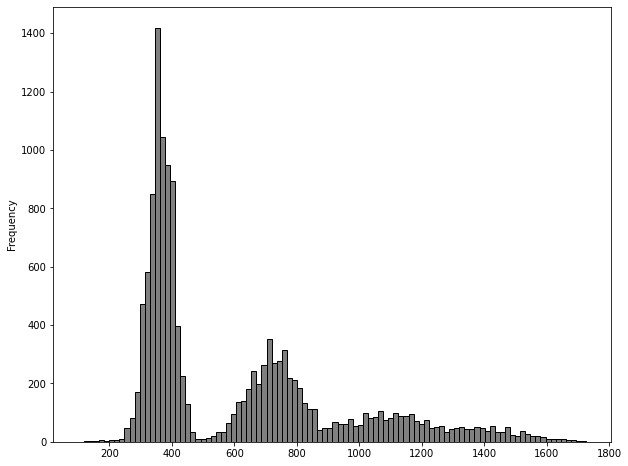

In [95]:
#try to understand employee retention, plot the frequency plot for employee was employed.
# there are peaks around each employee year anniversary
employed_length = data['duration'].dropna()
employed_length.plot.hist(column=['duration'], figsize = (10,8), bins =100, color='gray', edgecolor='black')


D:\temp\ipykernel_78268\3075836751.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data_quit_week_of_year = data['quit_date'].dt.week


<AxesSubplot:ylabel='Frequency'>

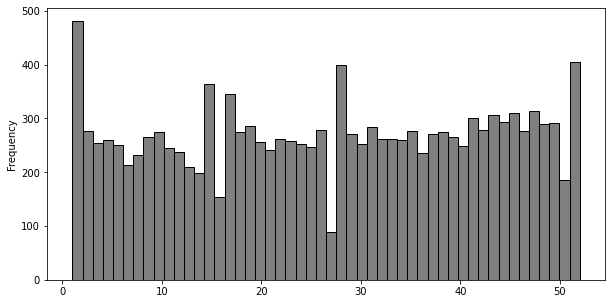

In [96]:
# plot the week of the year
data_quit_week_of_year = data['quit_date'].dt.week
data_quit_week_of_year.plot.hist(figsize= (10, 5), bins = 50, color ='gray', edgecolor = 'black')

<AxesSubplot:ylabel='Frequency'>

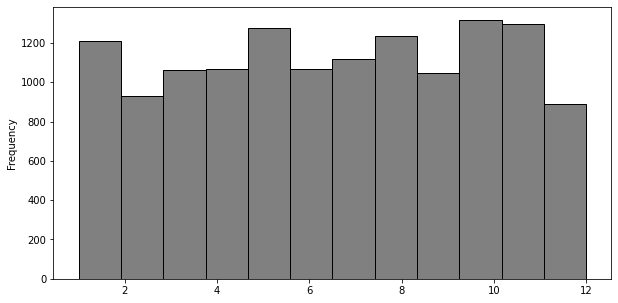

In [97]:
#plot the month of the year
data_quit_month_of_year = data['quit_date'].dt.month
data_quit_month_of_year.plot.hist(figsize = (10,5), bins = 12, color = 'gray', edgecolor = 'black')


it also peaks around the new year. Make sense, companies have much more budget to hire at the beginning of the year.

Find the characteristics of the people who quit early. looking at the histogram of employment_length,
it looks like we define early quitters as those people who quit within 1 year or so. Then create two classes of employees:

* quit within 13 months
* quit longer than 13 months

In [189]:
data_class = data
data_class['class'] = 0
data_class.info()
data_class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          24702 non-null  int64         
 1   employee_id    24702 non-null  float64       
 2   company_id     24702 non-null  int64         
 3   dept           24702 non-null  object        
 4   seniority      24702 non-null  int64         
 5   salary         24702 non-null  float64       
 6   join_date      24702 non-null  datetime64[ns]
 7   quit_date      13510 non-null  datetime64[ns]
 8   duration       13510 non-null  float64       
 9   cumcount_join  24702 non-null  int64         
 10  cumcount_quit  24702 non-null  int64         
 11  class          24702 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(6), object(1)
memory usage: 2.3+ MB


,index,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,cumcount_join,cumcount_quit,class
0,24518,751615.0,6,customer_service,6,63000.0,2011-01-31,2011-10-13,255.0,9,0,0
1,8465,972130.0,10,marketing,20,147000.0,2011-02-22,2011-10-14,234.0,9,0,0
2,15523,581263.0,1,sales,5,118000.0,2011-01-24,2011-10-21,270.0,16,0,0
3,15602,135834.0,4,engineer,16,169000.0,2011-02-07,2011-10-28,263.0,22,0,0
4,3777,71407.0,1,customer_service,19,107000.0,2011-01-25,2011-11-11,290.0,25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24697,8620,821435.0,2,data_science,22,332000.0,2015-12-09,NaT,NaN,4221,4221,0
24698,15854,973499.0,1,design,17,177000.0,2015-12-09,NaT,NaN,8484,8484,0
24699,24611,815645.0,3,data_science,3,57000.0,2015-12-09,NaT,NaN,2748,2748,0
24700,14533,957941.0,1,engineer,12,204000.0,2015-12-10,NaT,NaN,8485,8485,0


In [190]:
for i in range(0 , 24702):
    if data_class.iloc[i, 8] <= 365+31:
        data_class.iloc[i, 11] = 1
    elif data_class.iloc[i,6] <= pd.to_datetime('2015/12/13')-pd.to_timedelta('396 days') and pd.isnull(data_class.iloc[i, 7])  :
        data_class.iloc[i, 11] = 0
    elif data_class.iloc[i, 6] > pd.to_datetime('2015/12/13')-pd.to_timedelta('396 days') and pd.isnull(data_class.iloc[i, 7]) :
        data_class.iloc[i, 11]  = 2
    elif data_class.iloc[i, 8] > 365+31:
        data_class.iloc[i, 11] = 0


In [191]:
data_class = data_class[data['class']!=2]
data_class.groupby('class').count()

,index,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,cumcount_join,cumcount_quit
class,,,,,,,,,,,
0,13484,13484,13484,13484,13484,13484,13484,7541,7541,13484,13484
1,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969,5969


In [193]:
# look at the classification for each employee
data_class.info()
data_class.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19453 entries, 0 to 19452
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          19453 non-null  int64         
 1   employee_id    19453 non-null  float64       
 2   company_id     19453 non-null  int64         
 3   dept           19453 non-null  object        
 4   seniority      19453 non-null  int64         
 5   salary         19453 non-null  float64       
 6   join_date      19453 non-null  datetime64[ns]
 7   quit_date      13510 non-null  datetime64[ns]
 8   duration       13510 non-null  float64       
 9   cumcount_join  19453 non-null  int64         
 10  cumcount_quit  19453 non-null  int64         
 11  class          19453 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(6), object(1)
memory usage: 1.9+ MB


,index,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,cumcount_join,cumcount_quit,class
0,24518,751615.0,6,customer_service,6,63000.0,2011-01-31,2011-10-13,255.0,9,0,1
1,8465,972130.0,10,marketing,20,147000.0,2011-02-22,2011-10-14,234.0,9,0,1
2,15523,581263.0,1,sales,5,118000.0,2011-01-24,2011-10-21,270.0,16,0,1
3,15602,135834.0,4,engineer,16,169000.0,2011-02-07,2011-10-28,263.0,22,0,1
4,3777,71407.0,1,customer_service,19,107000.0,2011-01-25,2011-11-11,290.0,25,1,1


In [195]:
#find the type of dept is object, change to int, and drop the index, duration,cumjoin, cumquit column
data_class['dept'].replace(data_class['dept'].unique(),range(len(data_class['dept'].unique())), inplace = True)
data_class.drop(columns = ['index', 'duration', 'cumcount_join', 'cumcount_quit'], inplace = True)


D:\temp\ipykernel_78268\2127987059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_class['dept'].replace(data_class['dept'].unique(),range(len(data_class['dept'].unique())), inplace = True)


KeyError: "['index', 'duration', 'cumcount_join', 'cumcount_quit'] not found in axis"

In [197]:
#Use random forest to train data, separate data into train and test set
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
train_set, test_set = train_test_split(data_class, test_size = 0.3)

In [199]:
train_feature = train_set.iloc[:,1:5]
train_label = train_set.iloc[:,7]

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, oob_score =  True, random_state = 20)
rf.fit(train_feature, train_label)

In [135]:
#OOB error and test error is
print('OOB error:', rf.oob_score_)

OOB error: 0.5159141376757957
